In [22]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
etf = yf.Ticker("ACWI")
hist = etf.history(period="max", interval="1mo") 
hist.to_csv("ACWI_history.csv")

In [24]:
# Gold futures spot price
gold = yf.Ticker("GC=F")

# Download daily history
hist_gold = gold.history(period="max", interval="1mo")
hist_gold.to_csv("gold_history.csv")



In [25]:
# load csv files
gold = pd.read_csv("gold_history.csv")
acwi = pd.read_csv("ACWI_history.csv")

# make sure the date column is datetime
gold["Date"] = pd.to_datetime(gold["Date"])
acwi["Date"] = pd.to_datetime(acwi["Date"])

# merge on Date
df = pd.merge(gold, acwi, on="Date", how="inner")  
# inner = only common dates
# left/right/outer if you want different behavior

df = df.rename(columns={
    "Close_y": "close_acwi",
    "Close_x": "close_gold"
})

base_df = df[['Date','close_gold','close_acwi']]

C:\Users\mathi\AppData\Local\Temp\ipykernel_5064\4187085632.py:6: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  gold["Date"] = pd.to_datetime(gold["Date"])
C:\Users\mathi\AppData\Local\Temp\ipykernel_5064\4187085632.py:7: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  acwi["Date"] = pd.to_datetime(acwi["Date"])


In [26]:
base_df["ratio"] = base_df["close_acwi"] / base_df["close_gold"]
base_df["ret_acwi"] = base_df["close_acwi"].pct_change()
base_df["ret_gold"] = base_df["close_gold"].pct_change()
base_df["index_acwi"] = (1 + base_df["ret_acwi"]).cumprod()
base_df["index_gold"] = (1 + base_df["ret_gold"]).cumprod()
base_df["ratio_index"] = base_df["ratio"] / base_df["ratio"].iloc[0]
base_df.loc[base_df.index[0], "index_acwi"] = 1
base_df.loc[base_df.index[0], "index_gold"] = 1

C:\Users\mathi\AppData\Local\Temp\ipykernel_5064\2283695309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_df["ratio"] = base_df["close_acwi"] / base_df["close_gold"]
C:\Users\mathi\AppData\Local\Temp\ipykernel_5064\2283695309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_df["ret_acwi"] = base_df["close_acwi"].pct_change()
C:\Users\mathi\AppData\Local\Temp\ipykernel_5064\2283695309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [27]:
base_df.head()

,Date,close_gold,close_acwi,ratio,ret_acwi,ret_gold,index_acwi,index_gold,ratio_index
0,2008-03-01 00:00:00-05:00,916.200012,35.113640,0.038325,NaN,NaN,1.000000,1.000000,1.000000
1,2008-04-01 00:00:00-04:00,862.799988,37.911629,0.043940,0.079684,-0.058284,1.079684,0.941716,1.146507
2,2008-05-01 00:00:00-04:00,887.299988,38.239124,0.043096,0.008638,0.028396,1.089011,0.968457,1.124480
3,2008-07-01 00:00:00-04:00,913.900024,34.074181,0.037284,-0.108918,0.029979,0.970397,0.997490,0.972839
4,2008-08-01 00:00:00-04:00,829.299988,33.504616,0.040401,-0.016715,-0.092570,0.954177,0.905152,1.054162


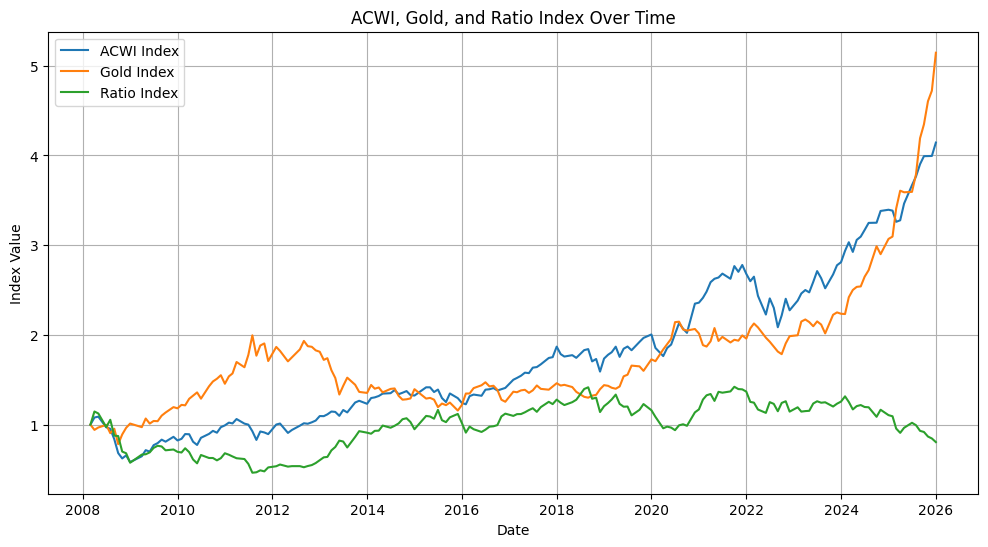

In [29]:
plt.figure(figsize=(12,6))

# plot the three indices
plt.plot(base_df["Date"], base_df["index_acwi"], label="ACWI Index")
plt.plot(base_df["Date"], base_df["index_gold"], label="Gold Index")
plt.plot(base_df["Date"], base_df["ratio_index"], label="Ratio Index")

# labels and title
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.title("ACWI, Gold, and Ratio Index Over Time")
plt.legend()

# optional: grid
plt.grid(True)

# Save the figure to the repository folder
plt.savefig("ACWI_Gold_Ratio_Index.png", dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
# This graph shows the evolution of three indices over time from 2008 to 2026:
# 1. ACWI Index (blue line) – represents global equity performance. It shows steady long-term growth with some volatility, particularly around 2008-2009 and 2020.
# 2. Gold Index (orange line) – tracks gold prices. Gold shows strong growth during crisis periods, outpacing ACWI around 2025-2026.
# 3. Ratio Index (green line) – the ratio of ACWI to Gold. Values above 1 indicate ACWI outperforming gold, below 1 means gold outperforms. 
#    The ratio is relatively flat, with peaks and dips, showing periods where gold or equities dominate.
# The x-axis is Date, and the y-axis is normalized Index Value starting at 1. Gridlines help track movements over time.
